
#Online Shoppers Purchasing Intention Classification


In [1]:
# Import required Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break


## Load Data 

In [2]:
data=pd.read_csv('/content/drive/MyDrive/CMT 307 Assessment/Coursework_1_data.csv')

Description of Target Label and Features

In [3]:
# The Basic Data information
print('\n The Shape of dataset\n',data.shape)

print('\n Information of the dataset\n',data.info())

print('\n Below is the statistics of the data\n',data.describe())



 The Shape of dataset
 (12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null 



*   The dataset consists of 18 feature vector belonging to 12330 sessions




Check the data for missing values

In [4]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No Missing value present

## Exploratory Data Aanlysis

Let's look at the distribution of depenedent Variable

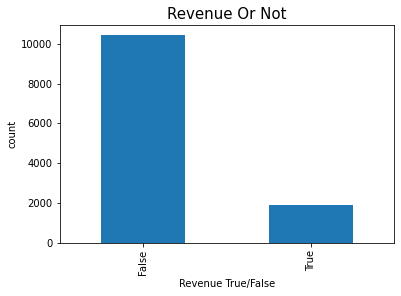

In [5]:
data['Revenue'].value_counts().plot(kind='bar')
plt.title('Revenue Or Not', fontsize = 15)
plt.xlabel('Revenue True/False', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.show()

*The target variable is highly Imbalanced*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration of Administrative pages visited')

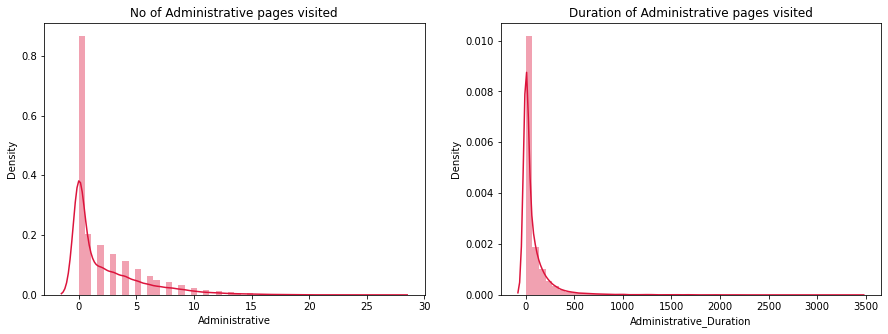

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.distplot(data['Administrative'],hist=True,color='crimson')      #Distribution plot of 'Administrative' feature
plt.title('No of Administrative pages visited')
plt.subplot(122)
sns.distplot(data['Administrative_Duration'],color= "crimson",hist=True)    ##Distribution plot of 'AdministrativeRelated Duration' feature
plt.title('Duration of Administrative pages visited')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

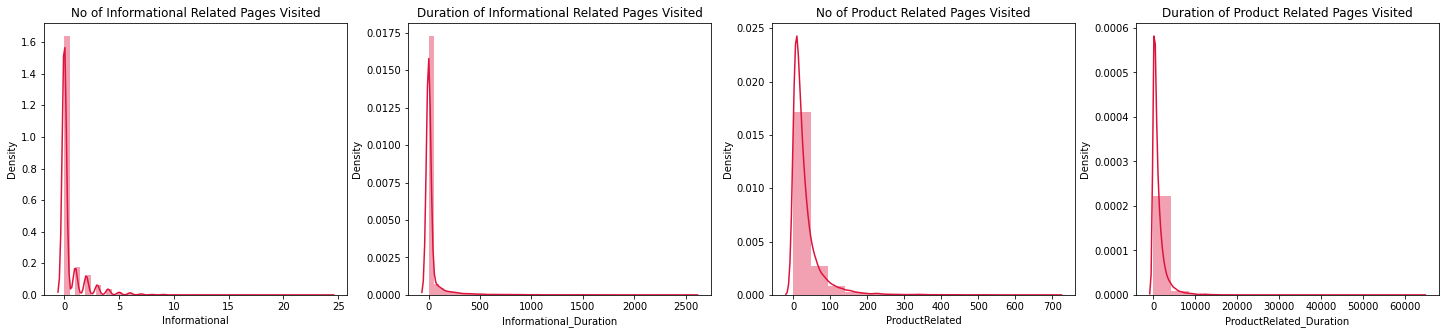

In [7]:
plt.figure(figsize=(25,5))
plt.subplot(141)
sns.distplot(data['Informational'],color ='crimson')            #distplot -Informational feature 
plt.title('No of Informational Related Pages Visited')
plt.subplot(142)
sns.distplot(data['Informational_Duration'], color= "crimson")  #distplot -Informational_Duration feature
plt.title('Duration of Informational Related Pages Visited')
plt.subplot(143)
sns.distplot(data['ProductRelated'] ,bins=15,color='crimson')   #distplot -Product_Related feature
plt.title('No of Product Related Pages Visited')
plt.subplot(144)
sns.distplot(data['ProductRelated_Duration'],bins=15, color= "crimson")  #distplot -ProductRelated_Duration feature
plt.title('Duration of Product Related Pages Visited')
plt.show()

The distribution for Administrative_Duration is right skewed. A good no. of users do spend time on the Administratve pages.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


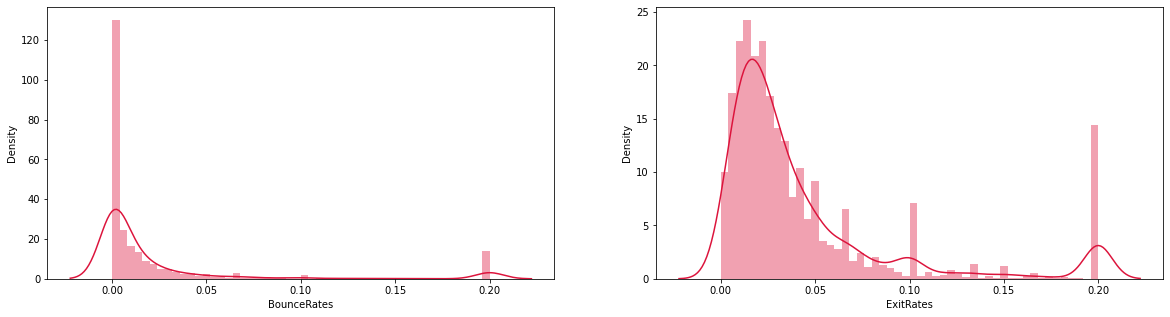

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(data['BounceRates'] ,color='crimson')    #Distribution of BounceRates
plt.subplot(122)
sns.distplot(data['ExitRates'], color= "crimson")     #Distribution of ExitRates
plt.show()

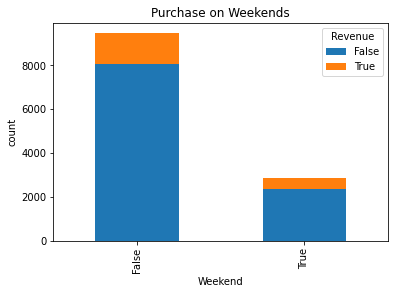

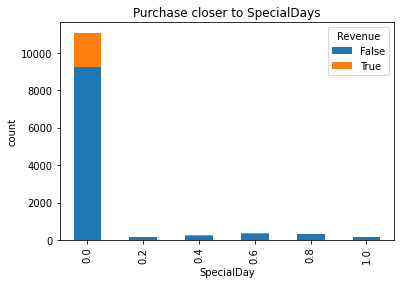

In [9]:
#Revenue genration on weekends
weekend_purchase = data.groupby(['Revenue', 'Weekend']).size().reset_index().pivot(columns='Revenue', index='Weekend', values=0)
weekend_purchase.plot(kind='bar', stacked=True)             
plt.title('Purchase on Weekends')
plt.ylabel('count', fontsize = 10)

#Revenue genration closer to special days
specialday_purchase=data.groupby(['Revenue','SpecialDay']).size().reset_index().pivot(columns='Revenue',index='SpecialDay',values=0)
specialday_purchase.plot(kind='bar', stacked=True)
plt.title('Purchase closer to SpecialDays')
plt.ylabel('count', fontsize = 10)
plt.show()

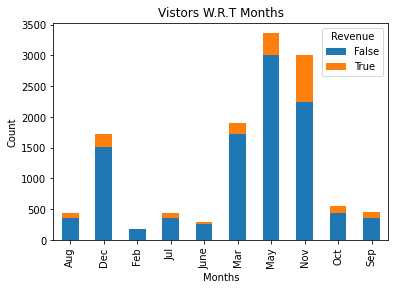

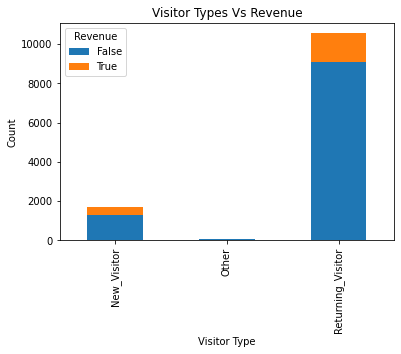

In [10]:
# Visitors in each month
Monthly_Revenue = data.groupby(['Revenue', 'Month']).size().reset_index().pivot(columns='Revenue', index='Month', values=0)
Monthly_Revenue.plot(kind='bar', stacked=True)
plt.title('Vistors W.R.T Months')
plt.xlabel('Months', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

# Visitor types
Visitor_types = data.groupby(['Revenue', 'VisitorType']).size().reset_index().pivot(columns='Revenue', index='VisitorType', values=0)
Visitor_types.plot(kind='bar', stacked=True)
plt.title('Visitor Types Vs Revenue')
plt.xlabel('Visitor Type', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

Maximum visits in May , however the revenue success rate is higher in November

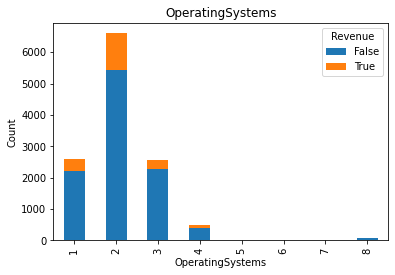

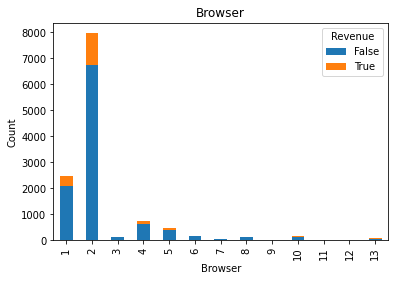

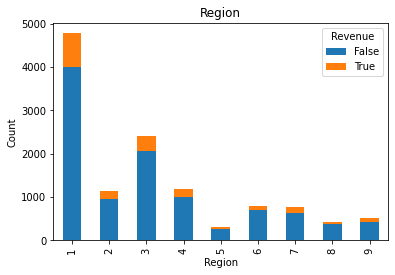

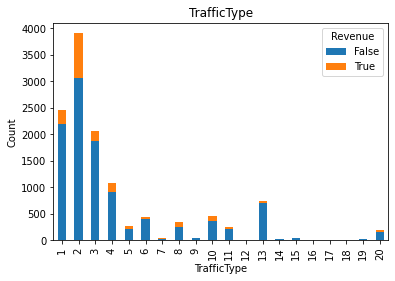

In [11]:

# Opearating System 
operating_system = data.groupby(['Revenue', 'OperatingSystems']).size().reset_index().pivot(columns='Revenue', index='OperatingSystems', values=0)
operating_system.plot(kind='bar', stacked=True)
plt.title('OperatingSystems')
plt.xlabel('OperatingSystems', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

# Browser Vs Revenue
browser = data.groupby(['Revenue', 'Browser']).size().reset_index().pivot(columns='Revenue', index='Browser', values=0)
browser.plot(kind='bar', stacked=True)
plt.title('Browser')
plt.xlabel('Browser', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

#Region Vs Revenue
region = data.groupby(['Revenue', 'Region']).size().reset_index().pivot(columns='Revenue', index='Region', values=0)
region.plot(kind='bar', stacked=True)
plt.title('Region')
plt.xlabel('Region', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

# Traffic Type Vs Revenue
Traffictype = data.groupby(['Revenue', 'TrafficType']).size().reset_index().pivot(columns='Revenue', index='TrafficType', values=0)
Traffictype.plot(kind='bar', stacked=True)
plt.title('TrafficType')
plt.xlabel('TrafficType', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


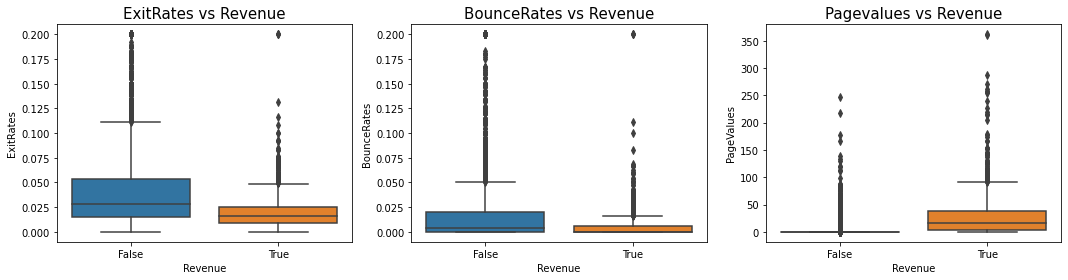

In [12]:
# Box Plots with restpect to Revenue
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.boxplot('Revenue', 'ExitRates', data=data)
plt.title('ExitRates vs Revenue', fontsize = 15)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('ExitRates', fontsize = 10)
plt.subplot(132)
sns.boxplot('Revenue', 'BounceRates', data=data)
plt.title('BounceRates vs Revenue', fontsize = 15)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('BounceRates', fontsize = 10)
plt.subplot(133)
sns.boxplot('Revenue', 'PageValues', data=data)
plt.title('Pagevalues vs Revenue', fontsize = 15)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('PageValues', fontsize = 10)
plt.show()

Correlation Matrix

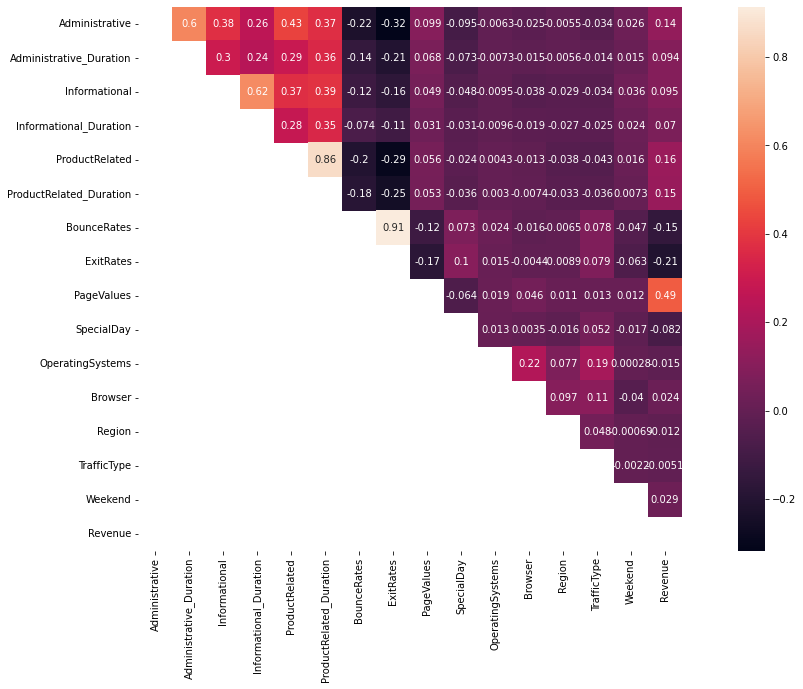

In [13]:
plt.figure(figsize=(20,10))
matrix = np.tril(data.corr())
sns.heatmap(data.corr(),annot=True,square=True,mask = matrix)
plt.savefig('heat.png')

Correlation matrix shows the correlation between any two variables.   
A high correlation between  predictor variables can cause the problem of multicollinearity.  
In the correlation above, the relationship between ProductRelated_Duration and ProductRelated is 0.86 and ExitRates and BounceRates is 0.91.  


Scatter Plots

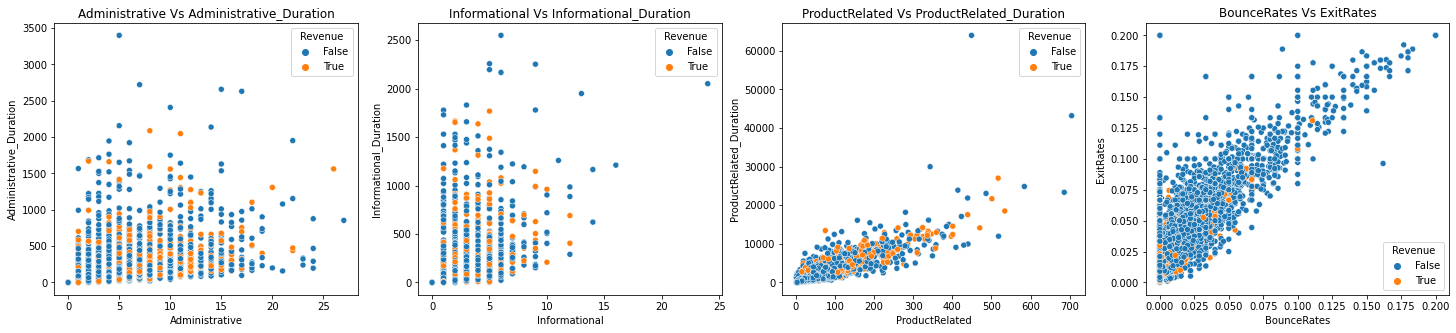

In [14]:
plt.figure(figsize=(25,5))
plt.subplot(141)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=data)
plt.title('Administrative Vs Administrative_Duration')
plt.subplot(142)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=data)
plt.title('Informational Vs Informational_Duration')
plt.subplot(143)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=data)
plt.title('ProductRelated Vs ProductRelated_Duration')
plt.subplot(144)
sns.scatterplot(x="BounceRates", y="ExitRates",hue="Revenue", data=data)
plt.title('BounceRates Vs ExitRates')
plt.show()

Lets check the percenytage of outliers present in numerical features

In [15]:
outlier_vars=['Administrative_Duration','Informational_Duration', 'ProductRelated_Duration',
'BounceRates', 'ExitRates', 'PageValues']               #List of numerical features

In [16]:

# identifing outliers with IQR
out_percent=[]
for i in outlier_vars:
    data_Q1, data_Q3 = data[i].quantile(0.25), data[i].quantile(0.75)
    IQR = data_Q3-data_Q1
    lower, upper = data_Q1 - 1.5 *IQR, data_Q3+1.5*IQR
    print(i,': \n')
    outliers = [x for x in data[i] if x < lower or x > upper]
    
    out_id=len(outliers)
    print('Outliers identified: %d' % out_id)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    not_out=len(outliers_removed)
    print('Non-outlier: %d' % not_out)
    outlier_percent=(out_id/(out_id+not_out))*100
    print('Percent of outliers:',outlier_percent ,'\n')
    out_percent.append(outlier_percent)

Administrative_Duration : 

Outliers identified: 1172
Non-outlier: 11158
Percent of outliers: 9.505271695052716 

Informational_Duration : 

Outliers identified: 2405
Non-outlier: 9925
Percent of outliers: 19.505271695052716 

ProductRelated_Duration : 

Outliers identified: 961
Non-outlier: 11369
Percent of outliers: 7.793998377939984 

BounceRates : 

Outliers identified: 1551
Non-outlier: 10779
Percent of outliers: 12.579075425790753 

ExitRates : 

Outliers identified: 1099
Non-outlier: 11231
Percent of outliers: 8.9132197891322 

PageValues : 

Outliers identified: 2730
Non-outlier: 9600
Percent of outliers: 22.14111922141119 



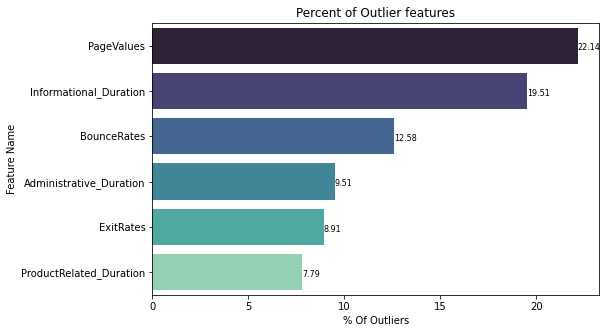

In [17]:
outliers=pd.DataFrame({'Feature':outlier_vars,'% Of Outliers':out_percent})
outliers=outliers.sort_values('% Of Outliers',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(y=outliers['Feature'],x=outliers['% Of Outliers'],palette='mako')
plt.title('Percent of Outlier features')
plt.ylabel('Feature Name')
for i, v in enumerate(list(outliers['% Of Outliers'])):
    plt.text(v,i-(-0.1),round(list(outliers['% Of Outliers'])[i],2),fontsize=8)

Removing the outliers with IQR will delete a good amount of valuable data . 

##Feature Engineering



Encoding Categorical Variables

In [18]:
# Converting the catagoriacl features to type object
data['Region']=data['Region'].astype('object')
data['OperatingSystems']=data['OperatingSystems'].astype('object')
data['Browser']=data['Browser'].astype('object')
data['TrafficType']=data['TrafficType'].astype('object')

# From the EDA choosing the top values of features based on the count
top_regions=[1,2,3,4,6]
top_os=[1,2,3]
top_browser=[1,2,4]
top_traffic=[1,2,3,4,13]

# Retaining the top features and flagging rest as others
data["Region_new"] = np.where(data["Region"].isin(top_regions), data['Region'], "Other")
data['OS']=np.where(data["OperatingSystems"].isin(top_os), data['OperatingSystems'], "Other")
data["Browser_new"] = np.where(data["Browser"].isin(top_browser), data['Browser'], "Other")
data['TrafficType_New']=np.where(data["TrafficType"].isin(top_traffic), data['TrafficType'], "Other")


In [26]:
data1=data.copy()
data1.drop(['Region','Browser','OperatingSystems','TrafficType'],axis=1,inplace=True)

In [27]:
Months=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ordi=OrdinalEncoder(categories=[Months])          #we are encoding the months based on the order of months from January to December
ordi.fit(data1[['Month']])
data1['Months']=ordi.transform(data1[['Month']])
data1.drop('Month',axis=1,inplace =True)
# label_encoder object                          #label encoding the variable Weekend
label_encoder =LabelEncoder()
# Encode labels in column. 
data1['Weekend']= label_encoder.fit_transform(data1['Weekend'])  #label encoding the variable 'Weekend'
data1['Revenue']=label_encoder.fit_transform(data1['Revenue'])   #label encoding the target variable

In [28]:
# creating dummy values(one-hot encoding) for the variable Visitor Type
data1=pd.get_dummies(data1, columns=['VisitorType','Region_new','OS','Browser_new','TrafficType_New'], drop_first=True)


In [29]:
#Checking multicolliniarity using Variable Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor 
data_vif=data1[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]
vif_data = pd.DataFrame()
vif_data["feature"] = data_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i)for i in range(len(data_vif.columns))]
  
print(vif_data)

                   feature       VIF
0           Administrative  2.650789
1  Administrative_Duration  2.041793
2            Informational  2.113500
3   Informational_Duration  1.777152
4           ProductRelated  6.309248
5  ProductRelated_Duration  6.007085
6              BounceRates  5.483943
7                ExitRates  5.715925
8               PageValues  1.077639


As we can see ProductRelated and ProductRelated_Duration has very high VIF values.Similarly ExitRate and BounceRate also shows higher VIF values.  
Therefore we can remove 'ProductRelated_Duration' and 'BounceRates'

In [30]:
data1.drop(['ProductRelated_Duration','BounceRates'],axis=1,inplace=True)

In [31]:
y = data1['Revenue']
X = data1.drop(['Revenue'], axis=1)
print(X.shape,y.shape)

(12330, 28) (12330,)


Scaling the numerical features of data

In [32]:
standardize = StandardScaler()
scaled_X = standardize.fit_transform(X)   #Using Z-score standardisation on the  predictor variables 

Split the dataset in to train and test data 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=101)

# checking the shapes

print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


We have already seen above the target variable 'Reveneue' is highly imbalanced. Applying Synthetic Minority Oversampling Technique(SMOTE) to treat the data imbalanace

Synthetic Minority Oversampling Technique(SMOTE)

In [34]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=3)

X_train,y_train=smote.fit_resample(X_train,y_train)

Text(0.5, 1.0, 'After SMOTE')

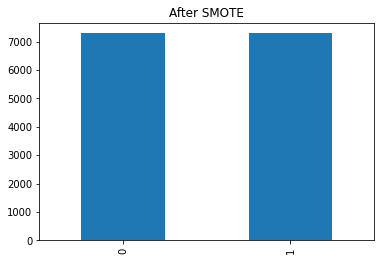

In [35]:
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('After SMOTE')

Logistic Regression

In [36]:
lr = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
              ,'max_iter':[100,150,200]} 
lr_grid = GridSearchCV(lr,
                        parameters,                     #Checking the best parametres to fit the model
                        refit=True,
                        verbose=3)
lr_grid.fit(X_train,y_train)
print(lr_grid.best_estimator_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.01, max_iter=100, solver=newton-cg;, score=0.814 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=100, solver=newton-cg;, score=0.832 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=100, solver=newton-cg;, score=0.826 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=100, solver=newton-cg;, score=0.830 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=100, solver=newton-cg;, score=0.833 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=100, solver=lbfgs;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, solver=lbfgs;, score=0.832 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, solver=lbfgs;, score=0.826 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=100, solver=lbfgs;, score=0.830 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 1/5] END ..C=0.01, max_iter=100, solver=sag;, score=0.814 total time=   0.1s
[CV 2/5] END ..C=0.01, max_

Logestic Regression Performance:
Accuracy        :  0.8732089753987564
F1 Score        :  0.6455026455026455
Precision       :  0.5670650730411687
Recall          :  0.7491228070175439


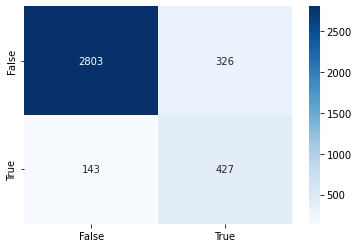

In [37]:
lr_tuned=LogisticRegression(C=100, max_iter=150,solver='saga')
model_lr = lr_tuned.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)

#Evaluating model
print('Logestic Regression Performance:')
print('Accuracy        : ', metrics.accuracy_score(y_test,y_pred_lr))
print('F1 Score        : ', metrics.f1_score(y_test,y_pred_lr))
print('Precision       : ', metrics.precision_score(y_test,y_pred_lr))
print('Recall          : ', metrics.recall_score(y_test,y_pred_lr))
ax1=sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot = True,fmt="d",cmap='Blues')
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()

Support Vector Classification

In [38]:
svm = SVC() #default values

parameter_svm = { 'gamma':[0.1, 5], 'C':[1, 10, 100]}
svm_grid = GridSearchCV(svm,
                        parameter_svm,        #best parameteres to fit the model
                        refit=True,
                        verbose=3)
svm_grid.fit(X_train,y_train)
print(svm_grid.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.896 total time=   7.3s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.922 total time=   9.5s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.932 total time=   7.6s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.921 total time=   7.8s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.920 total time=   7.7s
[CV 1/5] END ......................C=1, gamma=5;, score=0.879 total time=  31.8s
[CV 2/5] END ......................C=1, gamma=5;, score=0.834 total time=  33.1s
[CV 3/5] END ......................C=1, gamma=5;, score=0.818 total time=  31.7s
[CV 4/5] END ......................C=1, gamma=5;, score=0.824 total time=  33.5s
[CV 5/5] END ......................C=1, gamma=5;, score=0.834 total time=  32.1s
[CV 1/5] END ...................C=10, gamma=0.1;, score=0.916 total time=   5.5s
[CV 2/5] END ...................C=10, gamma=0.1;,

SVC Performance:
----------------------
Accuracy        :  0.8510408218437415
F1 Score        :  0.495882891125343
Precision       :  0.5181644359464627
Recall          :  0.47543859649122805


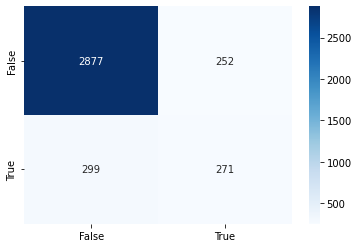

In [39]:
svm_tuned = SVC(kernel='rbf',C=100, gamma=0.1)
svm_tuned.fit(X_train,y_train)
svm_pred = svm_tuned.predict(X_test)

print('SVC Performance:')
print('----------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_test, svm_pred))
print('Precision       : ', metrics.precision_score(y_test, svm_pred))
print('Recall          : ', metrics.recall_score(y_test, svm_pred))
ax2=sns.heatmap(confusion_matrix(y_test, svm_pred), annot = True,fmt="d",cmap='Blues')
ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])
plt.show()

Random Forest

Random Forest Performance:
----------------------------------
Accuracy        :  0.8837523655041903
F1 Score        :  0.6786248131539612
Precision       :  0.5911458333333334
Recall          :  0.7964912280701755


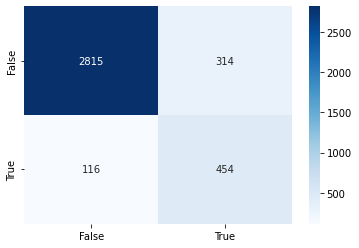

In [40]:
rf=RandomForestClassifier(n_estimators=30,max_depth=8,max_features=20,
                          min_samples_leaf=15,min_samples_split=5)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print('Random Forest Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, rf_pred))
print('F1 Score        : ', metrics.f1_score(y_test, rf_pred))
print('Precision       : ', metrics.precision_score(y_test, rf_pred))
print('Recall          : ', metrics.recall_score(y_test, rf_pred))
ax3=sns.heatmap(confusion_matrix(y_test, rf_pred), annot = True,fmt="d",cmap='Blues')
ax3.xaxis.set_ticklabels(['False','True'])
ax3.yaxis.set_ticklabels(['False','True'])
plt.show()


Gradient Boost

Gradient Boost  Performance:
---------------------------------
Accuracy        :  0.8905109489051095
F1 Score        :  0.6853146853146852
Precision       :  0.6150627615062761
Recall          :  0.7736842105263158


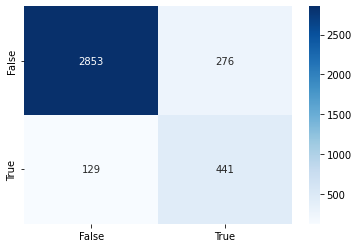

In [42]:
gbm= GradientBoostingClassifier(loss='exponential',
                                learning_rate=0.1,
                                n_estimators=30,
                                subsample=0.7,
                                min_samples_split=5,
                                min_samples_leaf=15,
                                max_depth=20,
                                max_features='sqrt')
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_test)

print('Gradient Boost  Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, gbm_pred))
print('F1 Score        : ', metrics.f1_score(y_test, gbm_pred))
print('Precision       : ', metrics.precision_score(y_test, gbm_pred))
print('Recall          : ', metrics.recall_score(y_test, gbm_pred))
ax4=sns.heatmap(confusion_matrix(y_test, gbm_pred), annot = True,fmt="d",cmap='Blues')
ax4.xaxis.set_ticklabels(['False','True'])
ax4.yaxis.set_ticklabels(['False','True'])
plt.show()

Voting Classifier

Votting Classifier  Performance:
----------------------------------
Accuracy        :  0.8924033522573669
F1 Score        :  0.6688851913477537
Precision       :  0.6360759493670886
Recall          :  0.7052631578947368


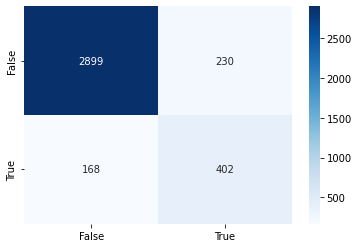

In [43]:
# combine the above 4 classifier usign majority voting 'hard'.
voting_clf = VotingClassifier(
    estimators=[('lr', lr_tuned), ('rf',rf), ('svc', svm_tuned),('gbm',gbm)],
    voting='hard')
voting_clf.fit(X_train,y_train)
voting_pred = voting_clf.predict(X_test)
print('Votting Classifier  Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, voting_pred))
print('F1 Score        : ', metrics.f1_score(y_test, voting_pred))
print('Precision       : ', metrics.precision_score(y_test, voting_pred))
print('Recall          : ', metrics.recall_score(y_test, voting_pred))
ax5=sns.heatmap(confusion_matrix(y_test, voting_pred), annot = True,fmt="d",cmap='Blues')
ax5.xaxis.set_ticklabels(['False','True'])
ax5.yaxis.set_ticklabels(['False','True'])
plt.show()


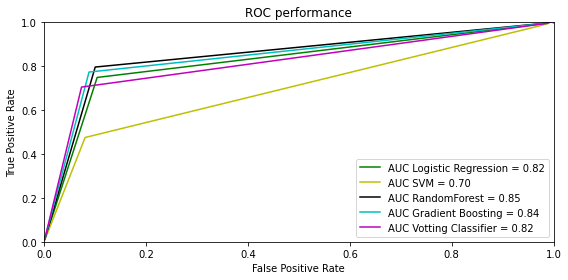

In [44]:
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test,y_pred_lr)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, svm_pred)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, rf_pred)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_test, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
fpr_vcf, tpr_vcf, threshold_vcf = metrics.roc_curve(y_test, voting_pred)
roc_auc_vcf = metrics.auc(fpr_vcf, tpr_vcf)

fig = plt.figure(figsize=(8, 4))
plt.title('ROC performance')
plt.plot(fpr_lr, tpr_lr, 'g', label = 'AUC Logistic Regression = %0.2f' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, 'y', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, 'k', label = 'AUC RandomForest = %0.2f' % roc_auc_rf)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC Gradient Boosting = %0.2f' % roc_auc_gbm)
plt.plot(fpr_vcf, tpr_vcf, 'm', label = 'AUC Votting Classifier = %0.2f' % roc_auc_vcf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()